In [2]:
library(Seurat)
library(tidyverse)

In [25]:
run_until_success <- function(...){
  funcs <- list(...)
  for (func in funcs) {
    result <- tryCatch({
      func()
    }, error = function(e){
      return(NULL)
    })
    if (!is.null(result)) {
      return(result)
    }
  }
  stop("All functions resulted in an error")
}


In [26]:
targets::tar_meta() %>%
filter(str_detect(name, 'obj_Day5.Fez1'))

name,type,data,command,depend,seed,path,time,size,bytes,format,repository,iteration,parent,children,seconds,warnings,error
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<list>,<dttm>,<chr>,<int64>,<chr>,<chr>,<chr>,<lgl>,<list>,<dbl>,<chr>,<chr>
obj_Day5.Fez1,stem,error,da86f9e5763276e7,d5f2ce6697778908,-748695575,NA,2024-01-13 17:03:55,de1c6d017cb4e8a8,38,qs,local,vector,NA,NA,19.171,NA,"argument is missing, with no default"


In [69]:
obj = qs::qread('_targets/objects/obj_Microglia')
obj

An object of class Seurat 
22244 features across 1024 samples within 2 assays 
Active assay: SCT (11122 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA

In [71]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', label=T) + NoLegend()

ERROR: [1m[33mError[39m in `object[[reduction]]`:[22m
[33m![39m ‘umap’ not found in this Seurat object
 


In [63]:
batch_to_correct = 'batch'
test = obj %>%
run_until_success(function() eval(.) %>% process_seurat(method = "integrate", 
                                              batch = "Index.10x_SCOP",
                                              dims = 30, res = 0.8,
                                              k.weight = 8000),
                               function() eval(.) %>% process_seurat(method = "integrate", 
                                              batch = "Index.10x_SCOP",
                                              dims = 30, res = 0.8,
                                              k.weight = 50),
                               function() eval(.) %>% process_seurat(method = "integrate", 
                                              batch = "Index.10x_SCOP",
                                              dims = 30, res = 0.8,
                                              k.weight = 20)
                              )

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normal

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14378
Number of edges: 729027

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7816
Number of communities: 14
Elapsed time: 3 seconds


In [64]:
test

An object of class Seurat 
21054 features across 14378 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [40]:
obj %>% subset

An object of class Seurat 
21054 features across 14378 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [9]:
obj %>% subset(subset = batch == 'Batch__3')

An object of class Seurat 
21054 features across 4871 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [12]:
function() obj %>% subset(subset='blah')

function() obj %>% subset(subset='blah')

In [29]:
obj %>%
function() eval(.) %>% subset(subset='blah')

ERROR: Error in obj %>% function() eval(.) %>% subset(subset = "blah"): invalid formal argument list for "function"


In [44]:
qs::qread('_targets/objects/obj_Day14.Agrp')

An object of class Seurat 
35110 features across 2196 samples within 2 assays 
Active assay: SCT (17555 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [35]:
run_until_success <- function(...){
  funcs <- list(...)
  for (func in funcs) {
    result <- tryCatch({
      func()
    }, error = function(e){
      return(NULL)
    })
    if (!is.null(result)) {
      return(result)
    }
  }
  stop("All functions resulted in an error")
}


In [41]:
func1 <- function() {
  return(10 / 'a') # This will cause a division by zero error
}

func2 <- function() {
  return(10 / 'a') # This will cause a division by zero error
}

func3 <- function() {
  return("Success!") # This will run without errors
}


In [43]:
result <- run_until_success(func1, func2, func1)
print(result)


ERROR: Error in run_until_success(func1, func2, func1): All functions resulted in an error


In [30]:
source("../00_preprocessing/splitwrapper.R")
source(paste0("../00_preprocessing/preprocessing.R"))
source(paste0("../01_milo/milo.R"))
source(paste0("../01_milo/milo_plotting.R"))
source(paste0("../00_cellbender/cellbender_preprocess.R"))
source("../00_cellbender/process_seurat.R")
source('milo_cellbender.R')

An object of class Seurat 
34106 features across 6863 samples within 2 assays 
Active assay: SCT (17053 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

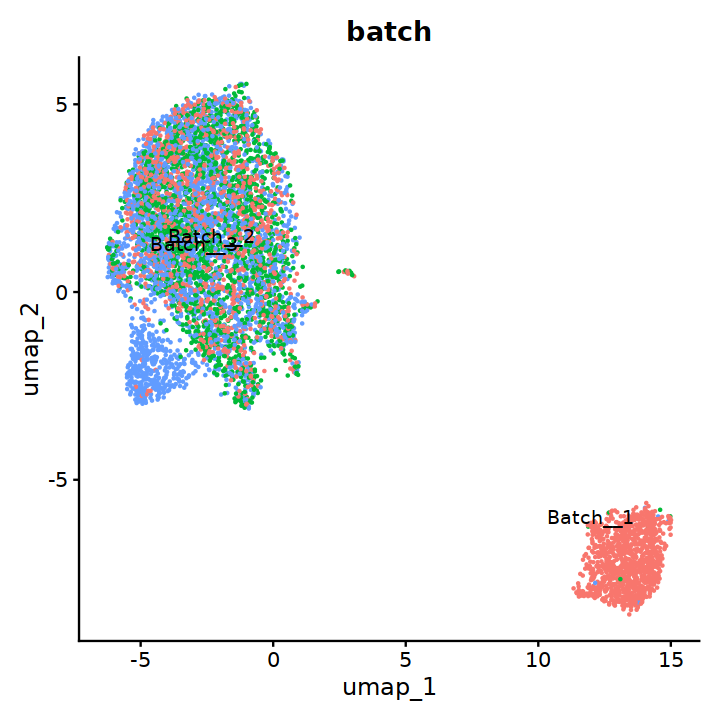

In [74]:
obj = qs::qread('_targets/objects/obj_Day5.Astrocytes')
obj

options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', label=T) + NoLegend()

In [78]:
obj@reductions$umap@cell.embeddings

,umap_1,umap_2
SI-TT-A11_AAAGTCCCAAATAAGC,13.698100,-7.6864923
SI-TT-A11_AAAGTCCGTGGTCTTA,13.914754,-7.1924475
SI-TT-A11_AAAGTGAAGGCATCGA,13.590711,-5.8019088
SI-TT-A11_AAAGTGATCATGGCCG,13.647361,-6.7241300
SI-TT-A11_AACAACCCACATCATG,13.995992,-7.1770566
SI-TT-A11_AACCAACCAGCGTACC,12.972141,-8.2422923
SI-TT-A11_AACCAACGTATGAGGC,13.980883,-7.9421557
SI-TT-A11_AACCATGAGACCAGAC,13.615371,-7.5767044
SI-TT-A11_AAGAACATCATTGGTG,13.292056,-6.8355416
SI-TT-A11_AAGATAGCATCGTCCT,2.992822,0.4566962


In [79]:
obj@graphs$SCT_nn

A Graph object containing 6863 cells

In [110]:
obj = obj %>% FindNeighbors(return.neighbor = TRUE, reduction = 'umap', dims = 2, k.param = 50)

Warning message:
“Object should have two dimensions, attempting to coerce to matrix”
Computing nearest neighbors

Only one graph name supplied, storing nearest-neighbor graph only



In [111]:
TopNeighbors(obj@neighbors$SCT.nn, 'SI-TT-A11_AAAGTCCCAAATAAGC', 50)

[1] "SI-TT-A11_AAAGTCCCAAATAAGC" "SI-TT-A11_AATCGTGCACCAACAT"
 [3] "SI-TT-A11_TCCTTTCGTAACACGG" "SI-TT-A11_AGAGAGCAGAGGCGGA"
 [5] "SI-TT-E10_CCGATCTCAGCTTTCC" "SI-TT-F10_AAGATAGTCGCTAAAC"
 [7] "SI-TT-A11_GGGTAGAGTGTGTGGA" "SI-TT-A11_ATTCTTGAGAGATGCC"
 [9] "SI-TT-A11_TCCTCGACAGGCTTGC" "SI-TT-A11_AGTAGCTGTGACACGA"
[11] "SI-TT-A11_TCATTCAGTCAGTTTG" "SI-TT-G10_CGCCAGACATACCGTA"
[13] "SI-TT-A11_ATCAGGTCATGCGTGC" "SI-TT-A11_TCCCAGTGTTTGGCTA"
[15] "SI-TT-F10_TGAGGTTAGGGATCGT" "SI-TT-A11_CAGTTAGGTGGCTAGA"
[17] "SI-TT-A11_TTGAGTGAGAATTGCA" "SI-TT-A11_TAGGGTTCACACCTAA"
[19] "SI-TT-F10_GTAATCGGTGGATGAC" "SI-TT-A11_GTCAAGTTCAGCTGTA"
[21] "SI-TT-F10_GAAGCGACACCAAATC" "SI-TT-E10_TTTAGTCGTGCGAACA"
[23] "SI-TT-F10_TGTAACGCAGGATGAC" "SI-TT-F10_GAAATGAGTGGCCACT"
[25] "SI-TT-F10_TCCGTGTTCCATAGGT" "SI-TT-A11_TTCTCTCGTTGCCGAC"
[27] "SI-TT-F10_CTCAGTCCATGACTGT" "SI-TT-F10_ATGCATGGTAGACACG"
[29] "SI-TT-A11_GAGGCCTAGGGAGGAC" "SI-TT-A11_ACGTTCCCAGCATGCC"
[31] "SI-TT-F10_CCGGGTACATAGGTTC" "SI-TT-F10_CATCGGGGTAGCCAGA"
[33] "SI-TT-F10_TTTAGTCAGTATCCTG" "SI-TT-F10_CCCTCAAGTCTCTCAC"
[35] "SI-TT-A11_ATGTCCCAGGTTGGAC" "SI-TT-G11_TCGGGACAGGAGCTGT"
[37] "SI-TT-F10_CAACAGTAGTATCCTG" "SI-TT-E10_ATGAGTCGTGCAACAG"
[39] "SI-TT-F10_TTACGCCTCGCCGATG" "SI-TT-F10_AGTGACTAGATGGCGT"
[41] "SI-TT-A11_CAAGGGATCAAGTCTG" "SI-TT-A11_CAACGATGTGCATTAC"
[43] "SI-TT-F10_TGTTCTAGTTTGGAGG" "SI-TT-F10_CTCCAACAGAGATGCC"
[45] "SI-TT-A11_CTAAGTGTCTTAGCTT" "SI-TT-A11_CTGGACGGTCTTGCGG"
[47] "SI-TT-A11_TCATTGTAGATTGATG" "SI-TT-F10_GAAGCCCGTCTGTGAT"
[49] "SI-TT-A11_TGTAGACTCGGTGTTA" "SI-TT-A11_TCGAAGTAGATGCGAC"

In [105]:
obj@neighbors$SCT.nn@cell.names

[1] "SI-TT-A11_AAAGTCCCAAATAAGC" "SI-TT-A11_AAAGTCCGTGGTCTTA"
   [3] "SI-TT-A11_AAAGTGAAGGCATCGA" "SI-TT-A11_AAAGTGATCATGGCCG"
   [5] "SI-TT-A11_AACAACCCACATCATG" "SI-TT-A11_AACCAACCAGCGTACC"
   [7] "SI-TT-A11_AACCAACGTATGAGGC" "SI-TT-A11_AACCATGAGACCAGAC"
   [9] "SI-TT-A11_AAGAACATCATTGGTG" "SI-TT-A11_AAGATAGCATCGTCCT"
  [11] "SI-TT-A11_AAGCATCAGATGTTGA" "SI-TT-A11_AAGCCATGTACCAGAG"
  [13] "SI-TT-A11_AAGGTAATCATAGACC" "SI-TT-A11_AAGTGAACAGGTGTGA"
  [15] "SI-TT-A11_AAGTGAATCCTGTTGC" "SI-TT-A11_AATCGTGCACCAACAT"
  [17] "SI-TT-A11_AATCGTGGTAGACGGT" "SI-TT-A11_AATGAAGTCGGATTAC"
  [19] "SI-TT-A11_AATGCCACACTGTGTA" "SI-TT-A11_AATTTCCAGAAGGCTC"
  [21] "SI-TT-A11_ACACCAACAGTACTAC" "SI-TT-A11_ACACGCGCATAATGAG"
  [23] "SI-TT-A11_ACAGAAACACACTTAG" "SI-TT-A11_ACAGAAACACGTCATA"
  [25] "SI-TT-A11_ACAGCCGGTATGGAGC" "SI-TT-A11_ACATCCCGTCCAGTTA"
  [27] "SI-TT-A11_ACATCCCGTTCAAGTC" "SI-TT-A11_ACCATTTAGGTCCCTG"
  [29] "SI-TT-A11_ACCCTCACATTGTCGA" "SI-TT-A11_ACGATCAAGCGTCTCG"
  [31] "SI-TT-A11_ACGATGTGTACAAAGT" "SI-TT-A11_ACGGGTCAGGGACAGG"
  [33] "SI-TT-A11_ACGGGTCGTCAGGCAA" "SI-TT-A11_ACGGGTCGTCCACTCT"
  [35] "SI-TT-A11_ACGGTCGCATGATAGA" "SI-TT-A11_ACGGTTACAAGCGCAA"
  [37] "SI-TT-A11_ACGTTCCCAGCATGCC" "SI-TT-A11_ACTACGAGTTCAAGTC"
  [39] "SI-TT-A11_ACTATGGTCCTGGCTT" "SI-TT-A11_ACTGTCCTCCCAAGCG"
  [41] "SI-TT-A11_ACTGTCCTCTGATTCT" "SI-TT-A11_ACTTCGCTCACGAACT"
  [43] "SI-TT-A11_ACTTCGCTCCATTGTT" "SI-TT-A11_AGAAATGTCGGCATCG"
  [45] "SI-TT-A11_AGAAGCGTCTGGGATT" "SI-TT-A11_AGAAGTACAGCGCTTG"
  [47] "SI-TT-A11_AGAGAATTCTGAGGCC" "SI-TT-A11_AGAGAGCAGAGGCGGA"
  [49] "SI-TT-A11_AGAGAGCGTTCATCGA" "SI-TT-A11_AGAGCAGGTCTGATAC"
  [51] "SI-TT-A11_AGATCGTGTAAGCAAT" "SI-TT-A11_AGCATCAAGTATGTAG"
  [53] "SI-TT-A11_AGCATCATCAGACCGC" "SI-TT-A11_AGCCAATAGTTATGGA"
  [55] "SI-TT-A11_AGCGCCACATAGCACT" "SI-TT-A11_AGCGCTGCATCCGGTG"
  [57] "SI-TT-A11_AGGAATAGTTCAGTAC" "SI-TT-A11_AGGAGGTTCGGCTTGG"
  [59] "SI-TT-A11_AGGAGGTTCTTAGCTT" "SI-TT-A11_AGGCATTGTTACAGCT"
  [61] "SI-TT-A11_AGGCTGCTCGTTCCCA" "SI-TT-A11_AGGGAGTAGGTCCGAA"
  [63] "SI-TT-A11_AGGGTCCCACGCACCA" "SI-TT-A11_AGGGTGATCAACACCA"
  [65] "SI-TT-A11_AGGGTTTAGGTTCCAT" "SI-TT-A11_AGGGTTTTCGATCCCT"
  [67] "SI-TT-A11_AGGTAGGAGGGAGTTC" "SI-TT-A11_AGGTCATAGCGCTGCT"
  [69] "SI-TT-A11_AGGTGTTAGTTGTAAG" "SI-TT-A11_AGTAGCTGTGACACGA"
  [71] "SI-TT-A11_AGTGTTGAGGATATGT" "SI-TT-A11_AGTGTTGGTTAATGAG"
  [73] "SI-TT-A11_ATAGACCAGGGCGAGA" "SI-TT-A11_ATAGGCTGTGAACGGT"
  [75] "SI-TT-A11_ATCACGACAAGATCCT" "SI-TT-A11_ATCACGACATCCTTCG"
  [77] "SI-TT-A11_ATCACGATCGTCGACG" "SI-TT-A11_ATCAGGTCATGCGTGC"
  [79] "SI-TT-A11_ATCATTCAGAAATTCG" "SI-TT-A11_ATCCACCCATGCGTGC"
  [81] "SI-TT-A11_ATCCGTCCAGTCTACA" "SI-TT-A11_ATCCTATCAACAGTGG"
  [83] "SI-TT-A11_ATCGATGGTCCCACGA" "SI-TT-A11_ATCGTCCGTAAGTAGT"
  [85] "SI-TT-A11_ATCTCTAAGTACTCGT" "SI-TT-A11_ATCTTCACAGTAGTGG"
  [87] "SI-TT-A11_ATGAAAGCATTCCTAT" "SI-TT-A11_ATGAAAGTCGAACACT"
  [89] "SI-TT-A11_ATGACCAGTAACCCGC" "SI-TT-A11_ATGAGGGAGGCATTTC"
  [91] "SI-TT-A11_ATGAGGGCATGAGATA" "SI-TT-A11_ATGGATCGTTTCTTAC"
  [93] "SI-TT-A11_ATGGTTGAGTTCCAGT" "SI-TT-A11_ATGTCCCAGGTTGGAC"
  [95] "SI-TT-A11_ATTACCTCAAGATGGC" "SI-TT-A11_ATTACTCCAATCCTAG"
  [97] "SI-TT-A11_ATTATCCAGATGTTGA" "SI-TT-A11_ATTCAGGAGGTCATTC"
  [99] "SI-TT-A11_ATTCATCCATATGCGT" "SI-TT-A11_ATTCTTGAGAGATGCC"
 [101] "SI-TT-A11_ATTTCACGTTTCTTAC" "SI-TT-A11_CAACAACCAGACAAGC"
 [103] "SI-TT-A11_CAACAGTCATAATGCC" "SI-TT-A11_CAACCTCGTTACACAC"
 [105] "SI-TT-A11_CAACCTCTCTGGGTCG" "SI-TT-A11_CAACGATGTGCATTAC"
 [107] "SI-TT-A11_CAAGACTAGCATGTTC" "SI-TT-A11_CAAGACTCAGGTGGAT"
 [109] "SI-TT-A11_CAAGGGATCAAGTCTG" "SI-TT-A11_CAATCGACACTAACGT"
 [111] "SI-TT-A11_CAATTTCTCAAGCCAT" "SI-TT-A11_CACACAAGTGCCTGCA"
 [113] "SI-TT-A11_CACAGGCAGCAGGCAT" "SI-TT-A11_CACCGTTGTTGTACGT"
 [115] "SI-TT-A11_CACGTGGGTGCCTAAT" "SI-TT-A11_CACTGAAGTGGCAACA"
 [117] "SI-TT-A11_CAGCACGTCGAGCACC" "SI-TT-A11_CAGCAGCAGTCTCCTC"
 [119] "SI-TT-A11_CAGTGCGGTGAATTAG" "SI-TT-A11_CAGTTAGGTGGCTAGA"
 [121] "SI-TT-A11_CATAAGCAGGGCGAGA" "SI-TT-A11_CATACAGGTTAGAAAC"
 [123] "SI-TT-A11_CATACTTGTGATGAAT" "S

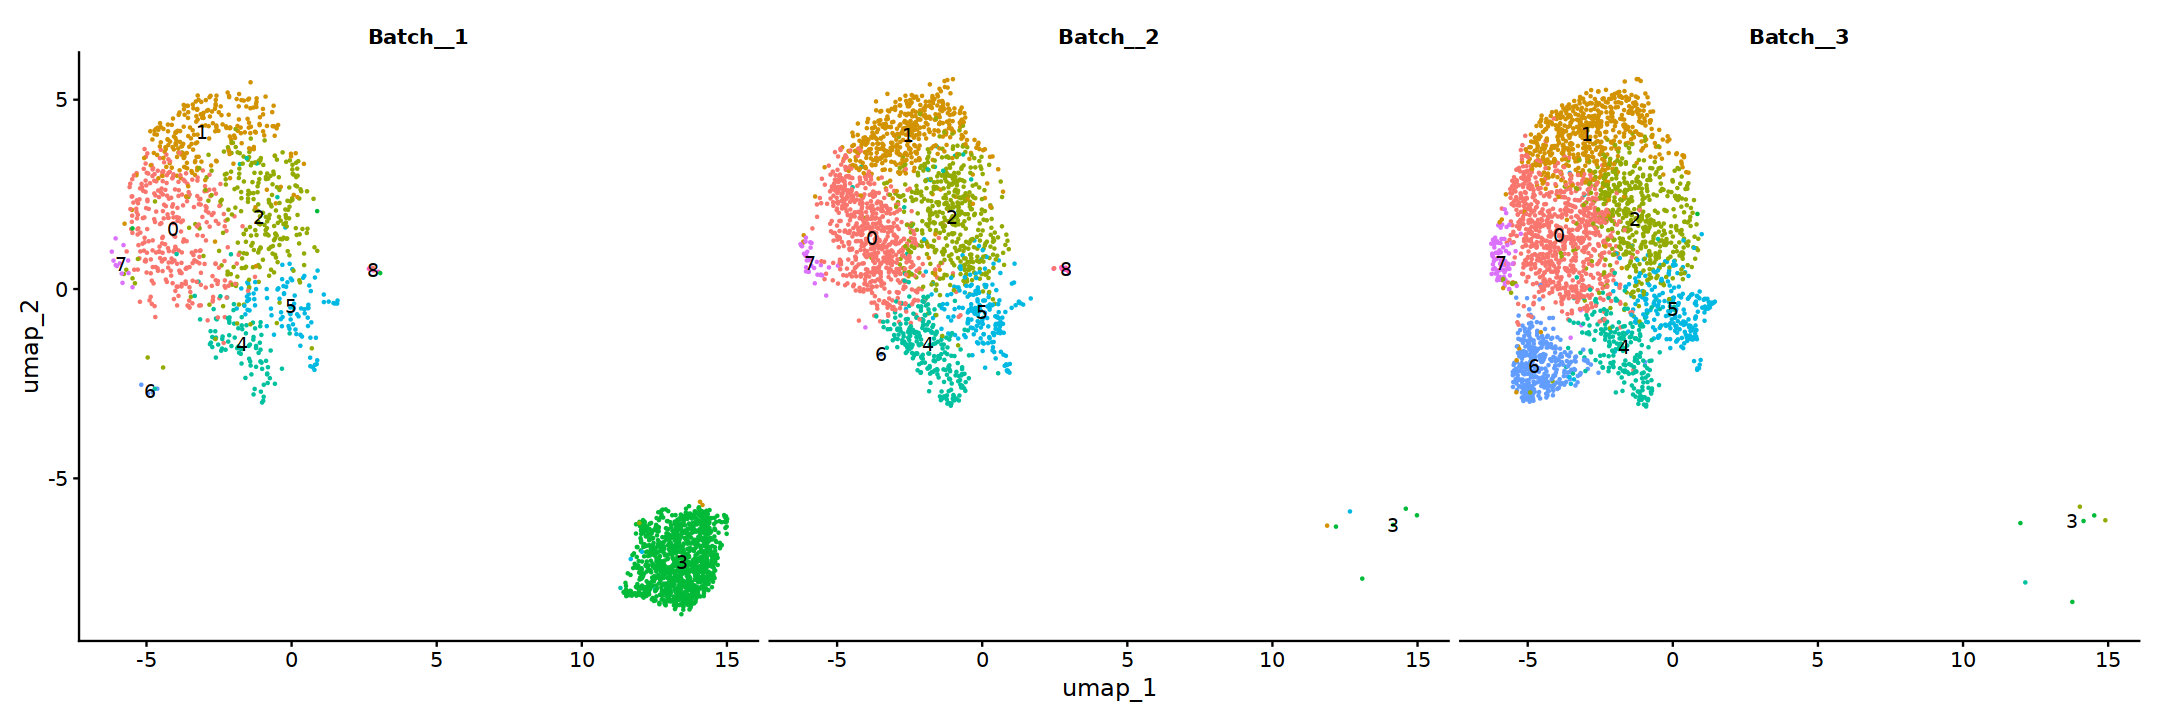

In [112]:
options(repr.plot.width=18, repr.plot.height=6)
DimPlot(obj, reduction = "umap", split.by='batch', label=T) + NoLegend()

In [71]:
obj = obj %>% process_seurat(method = "integrate", 
                            batch = "Index.10x_SCOP",
                            dims = 30, res = 0.8,
                            k.weight = 50)

obj

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.301”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.30103”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  7.0633e-16”
Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.3551”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = par

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6863
Number of edges: 406634

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7595
Number of communities: 15
Elapsed time: 1 seconds


An object of class Seurat 
19053 features across 6863 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

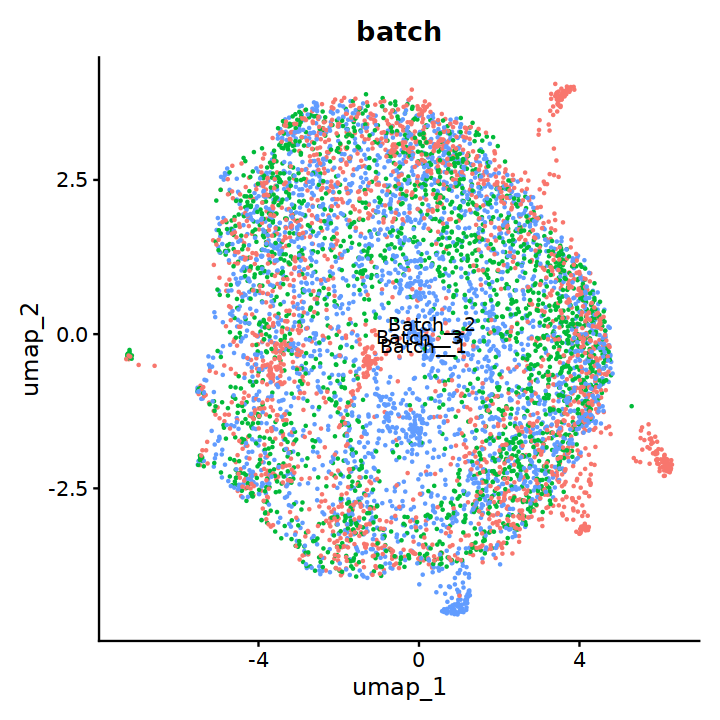

In [72]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', label=T) + NoLegend()

In [73]:
obj

An object of class Seurat 
19053 features across 6863 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [34]:
obj = obj %>% Seurat::SCTransform(assay='RNA',
                                               method="glmGamPoi",
                                               batch_var= "Index.10x_SCOP",
                                               vars.to.regress="batch",
                                               vst.flavor="v2",
                                               verbose=TRUE) 
obj

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 17053 by 6863

Model formula is y ~ (log_umi) : Index.10x_SCOP + Index.10x_SCOP + 0

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



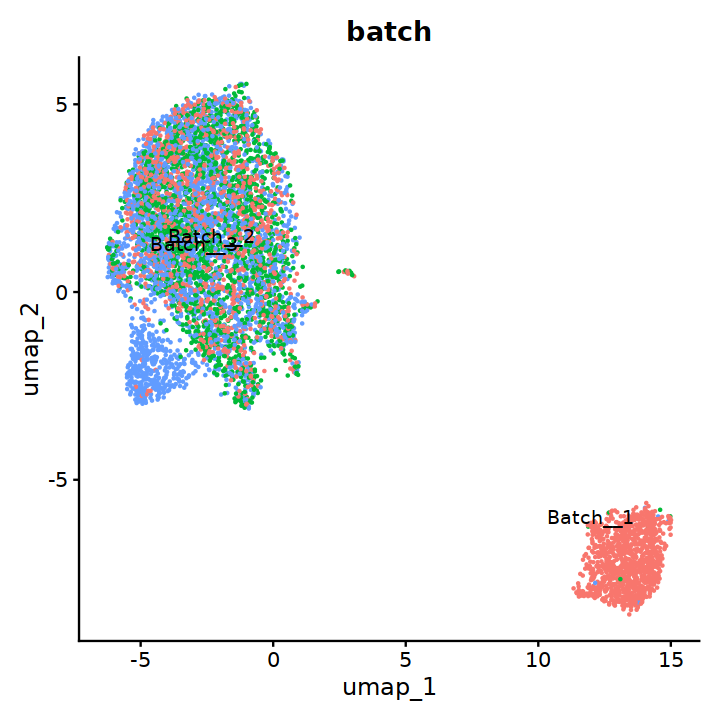

In [113]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', label=T) + NoLegend()

In [ ]:
obj$n

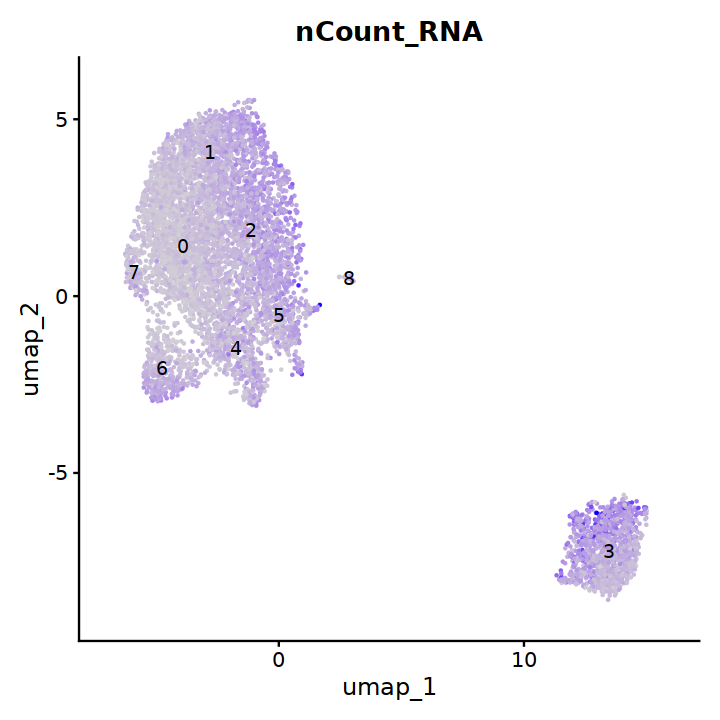

In [18]:
options(repr.plot.width=6, repr.plot.height=6)
FeaturePlot(obj, reduction = "umap", features = "nCount_RNA", label=T) + NoLegend()

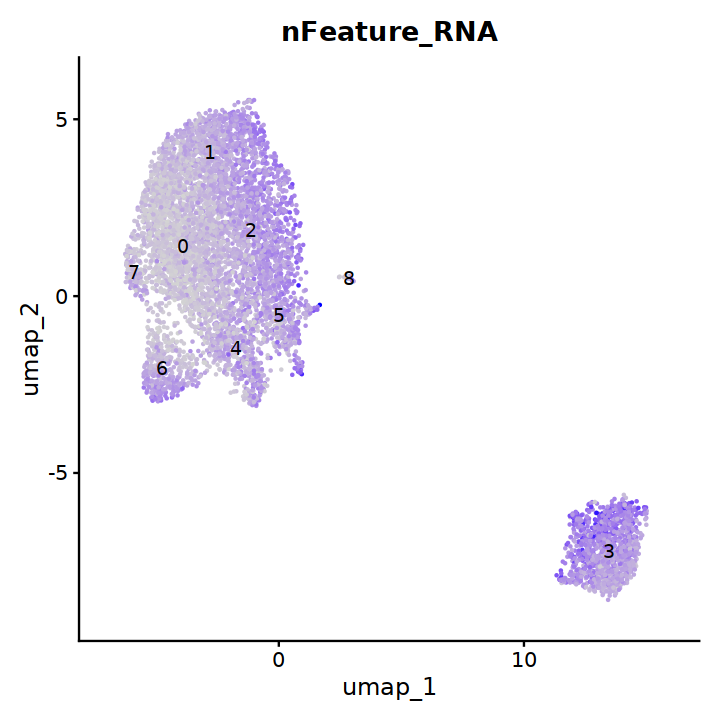

In [20]:
options(repr.plot.width=6, repr.plot.height=6)
FeaturePlot(obj, reduction = "umap", features = "nFeature_RNA", label=T) + NoLegend()

In [8]:
cluster_3_cells = obj %>% subset(subset = seurat_clusters == 3) %>% Cells
cluster_3_cells %>% head

[1] "SI-TT-A11_AAACGAACAAGGAGTC" "SI-TT-A11_AAACGAACAGCCTTCT"
[3] "SI-TT-A11_AAAGGTAAGGATGAGA" "SI-TT-A11_AACAACCCATCGTGCG"
[5] "SI-TT-A11_AACCATGCAGCCTTCT" "SI-TT-A11_AACGAAACAGTGGTGA"

In [10]:
obj_other = qs::qread('_targets/objects/obj_other')
obj_other

An object of class Seurat 
25126 features across 32121 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

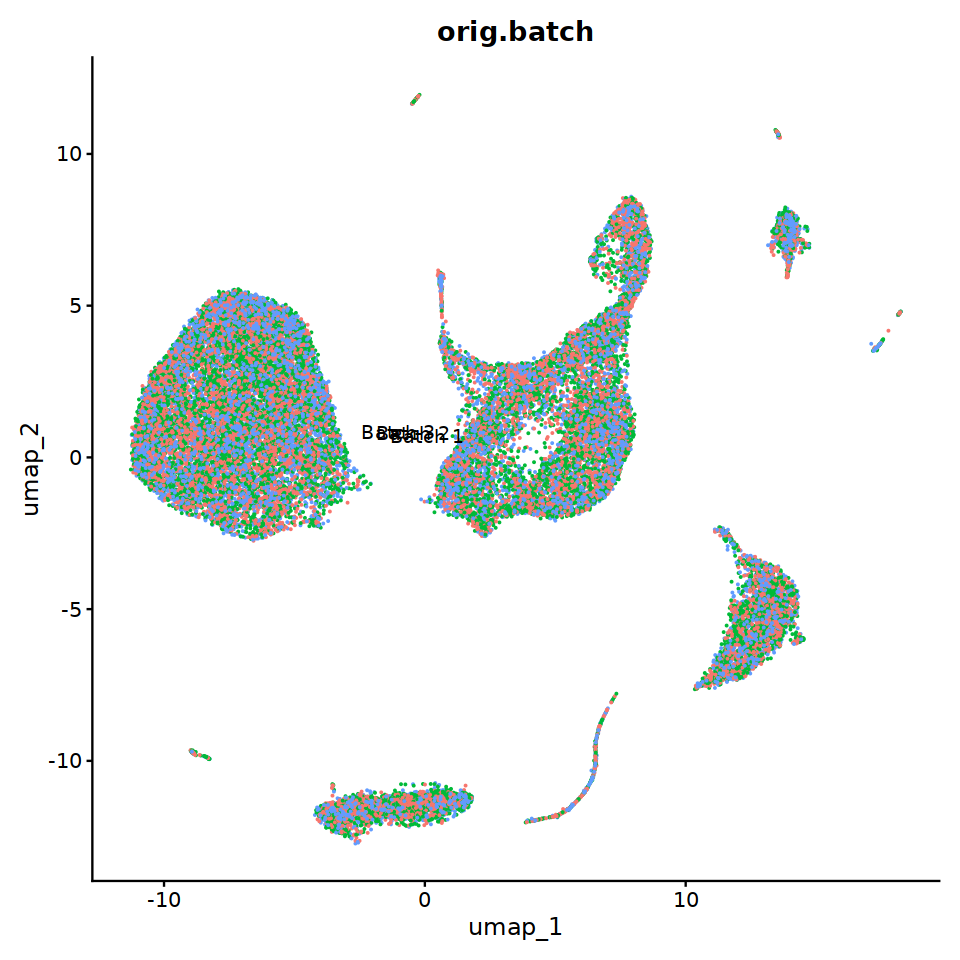

In [21]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(obj_other, reduction = "umap", group.by='orig.batch', label=T) + NoLegend()

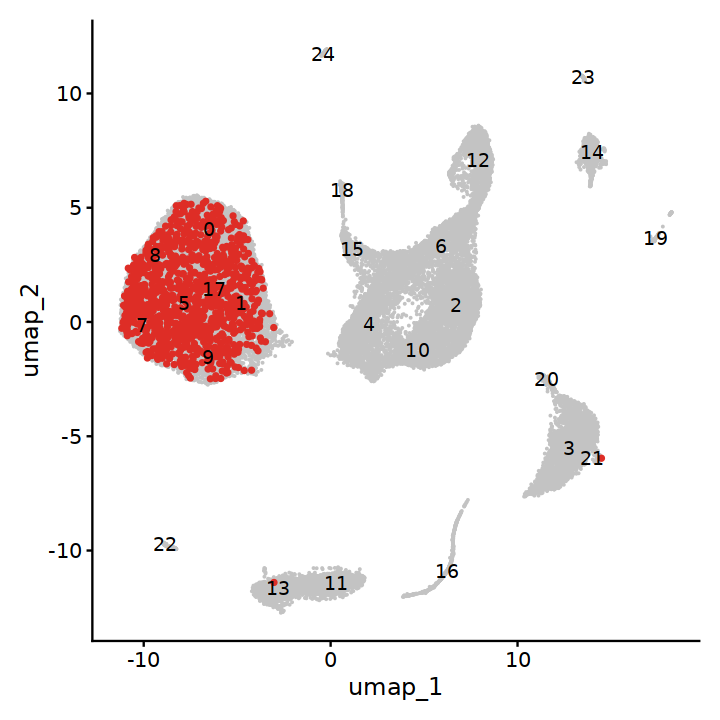

In [14]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj_other, reduction = "umap", cells.highlight = cluster_3_cells, label=T) + NoLegend()

In [67]:
# Define your functions
func1 <- function(...) x + y
func2 <- function(x, y) x * y
func3 <- function(x, y) x - y

# Arguments for each function
args_list <- list(list(x = 10, y='a'),
                  list(x = 100, y='b'),
                  list(x = 100, y=1))  # Arguments for func1, func2, func3 respectively

# Storing function and arguments separately
function_calls <- list(
  list(func = func1, args = args_list[[1]]),
  list(func = func2, args = args_list[[2]]),
  list(func = func3, args = args_list[[3]])
)

# Function to apply a function call from the list
apply_function_call <- function(f_call) {
  do.call(f_call$func, list(f_call$args))
}

# Using run_until_success with the list of function calls
result <- run_until_success(
  function() apply_function_call(function_calls[[1]]),
  function() apply_function_call(function_calls[[2]]),
  function() apply_function_call(function_calls[[3]])
)
print(result)


ERROR: Error in run_until_success(function() apply_function_call(function_calls[[1]]), : All functions resulted in an error


In [68]:
args_list[[1]]

$x
[1] 10

$y
[1] "a"